# Vehicle Classfication Model


In [1]:
# import required module
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import os

In [2]:
# varriables and hyperparameters
DATA_PATH='./data/'
IMAGE_SIZE=(300,300)
BATCH_SIZE=40
SEED=124
EPOCHS=10
OUTPUT_CLASSES = 3

## Preprocessing of dataset

In [3]:
# prepare dataset for training
train_data_generator = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_PATH, validation_split=0.15, subset="training", seed=SEED, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

# prepare dataset for validation
val_data_generator = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_PATH, validation_split=0.15, subset="validation", seed=SEED, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

Found 5400 files belonging to 3 classes.
Using 4590 files for training.
Found 5400 files belonging to 3 classes.
Using 810 files for validation.


## Explore the dataset

In [4]:
class_names=train_data_generator.class_names
class_names

['2w', 'bus', 'car']

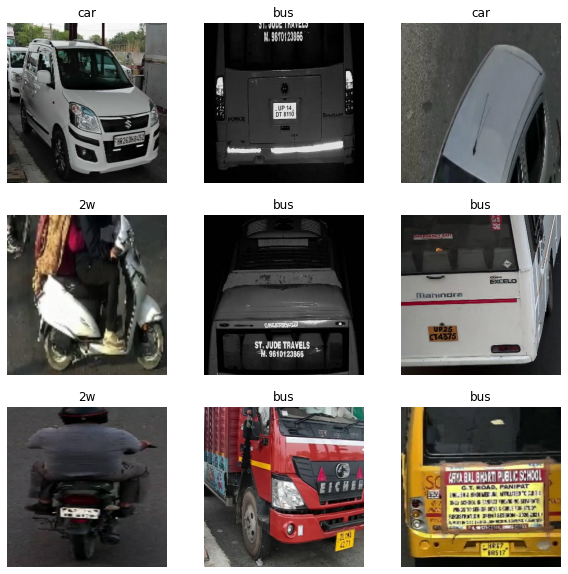

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_data_generator.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [6]:
for image_batch, labels_batch in train_data_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(40, 300, 300, 3)
(40,)


## generate model 

In [7]:
# sequential layer for data augumentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(
        *IMAGE_SIZE, 3)), tf.keras.layers.experimental.preprocessing.RandomRotation(0.2), tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])


SyntaxError: positional argument follows keyword argument (<ipython-input-7-3884aa817509>, line 2)

In [ ]:
# Creation of main model
model = tf.keras.models.Sequential([
    # data_augmentation,

    tf.keras.layers.experimental.preprocessing.Rescaling(
        1./255, input_shape=(*IMAGE_SIZE, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    #  tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu',),
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


## Model Training

In [ ]:
history = model.fit(
  train_data_generator,
  validation_data=val_data_generator,
  epochs=EPOCHS, callbacks=tf.keras.callbacks.EarlyStopping(patience=2)
)


In [ ]:
# serialize model
model.save('model.h5')

In [ ]:
# laod model
model=tf.keras.models.load_model('model.h5')

## Predicting Vehicle class

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    '/home/yateesh/Downloads/b5.jpeg', target_size=IMAGE_SIZE
)
img_array = tf.keras.preprocessing.image.img_to_array(img)

img.show()  # plot image
img_array = tf.expand_dims(img_array, 0) # Create a batch of one image
print(img_array.shape)
predictions = model.predict(img_array) # predict output
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(abs(predictions))], 100 * np.max(score))
)
np.argmax(abs(predictions))  # convert predictions to class